In [1]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import numpy as np
from sklearn_rvm import EMRVC

np.random.seed(1234)

In [3]:
drop = ['duration',
    'radiant_win',
    'tower_status_radiant',
    'tower_status_dire',
    'barracks_status_dire',
    'barracks_status_radiant']
drop_categorical = [
    'lobby_type',
    'r1_hero',
    'r2_hero',
    'r3_hero',
    'r4_hero',
    'r5_hero',
    'd1_hero',
    'd2_hero',
    'd3_hero',
    'd4_hero',
    'd5_hero'
]

tar = 'radiant_win'

data_train = pd.read_csv('./features.csv', index_col='match_id')
test = pd.read_csv('features_test.csv', index_col='match_id')

features = data_train.drop(labels=drop, axis = 1)
features_without_categorical = features.drop(labels = drop_categorical, axis = 1)
y = data_train[tar]

missing_features = features.columns[(features.count()<97230).values]
missing_features_test = test.columns[(test.count()<17177).values]
missing_features_test == missing_features

for mf in missing_features_test:
    test[mf] = test[mf].fillna(test[mf].mean())
    features[mf] = features[mf].fillna(features[mf].mean())

In [4]:
def transFORM(x, to_drop):
    N = 114
    X_ = np.zeros((x.shape[0], N))
    features_ = x.drop(labels = to_drop, axis = 1)
    for i, match_id in enumerate(x.index):
        for p in range(5):
            X_[i, x['r%d_hero' % (p+1)][match_id] -1] = 1
            X_[i, x['d%d_hero' % (p+1)][match_id] -1] = -1

    cols = [ 'p%d' % i for i in range(1, N+1)]

    X_plus = pd.DataFrame(X_, columns=cols, index=features_.index)

    X = pd.concat([X_plus, features_], axis=1)

    return X

In [5]:
X = transFORM(features, drop_categorical)
xx = transFORM(test, drop_categorical)

In [11]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', probability=True))
pred = clf.fit(X[:20000], y[:20000]).predict_proba(xx)

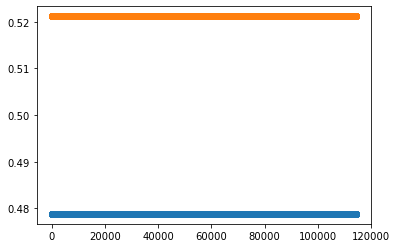

In [26]:
plt.scatter(xx.index, pred[:, 1])
plt.scatter(xx.index, pred[:, 0])
